In [116]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

---

### total.csv

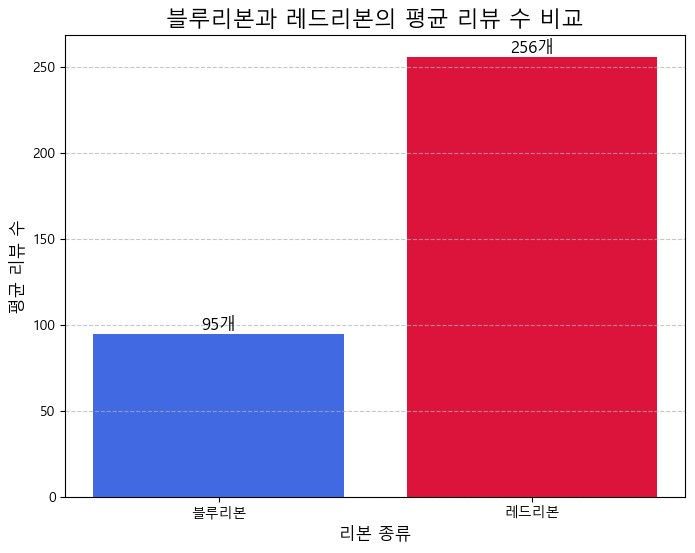

In [118]:
# 데이터 분석을 위한 pandas와 시각화를 위한 matplotlib 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib에서 한글 폰트를 사용하기 위한 설정입니다. ('Malgun Gothic'은 윈도우 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# --- 데이터 준비 (모든 시각화에 공통으로 사용) ---
# CSV 파일을 읽어와 데이터프레임으로 만듭니다.
df = pd.read_csv('./data/total_data.csv')
# 비어있는 값(NaN)을 모두 0으로 채웁니다.
df.fillna(0, inplace=True)
# '총 리뷰 수'를 계산하여 'total_reviews'라는 새로운 열에 저장합니다.
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']

# --- 1. 리본별 평균 리뷰 수 시각화 ---
# 블루리본을 1개 이상 받은 식당들의 'total_reviews' 열의 평균을 구합니다.
avg_reviews_blue = df[df['blue_ribbon_count'] > 0]['total_reviews'].mean()
# 레드리본을 1개 이상 받은 식당들의 'total_reviews' 열의 평균을 구합니다.
avg_reviews_red = df[df['red_ribbon_count'] > 0]['total_reviews'].mean()

# x축에 표시될 카테고리 이름과 y축에 표시될 값을 준비합니다.
categories = ['블루리본', '레드리본']
review_counts = [avg_reviews_blue, avg_reviews_red]

# 그래프를 그릴 도화지를 준비하고, 가로 8, 세로 6 크기로 설정합니다.
plt.figure(figsize=(8, 6))
# 막대 차트를 그립니다.
bars = plt.bar(categories, review_counts, color=['royalblue', 'crimson'])

# 각 막대의 위에 정확한 수치를 텍스트로 표시하기 위한 반복문입니다.
for bar in bars:
    yval = bar.get_height()
    # f'{yval:.0f}개'는 값을 정수로 변환하고 '개'를 붙여 표시하라는 의미입니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.0f}개', va='bottom', ha='center', fontsize=12)

# 그래프의 제목, x축 라벨, y축 라벨을 설정합니다.
plt.title('블루리본과 레드리본의 평균 리뷰 수 비교', fontsize=16)
plt.xlabel('리본 종류', fontsize=12)
plt.ylabel('평균 리뷰 수', fontsize=12)
# y축에 격자무늬를 추가하여 가독성을 높입니다.
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

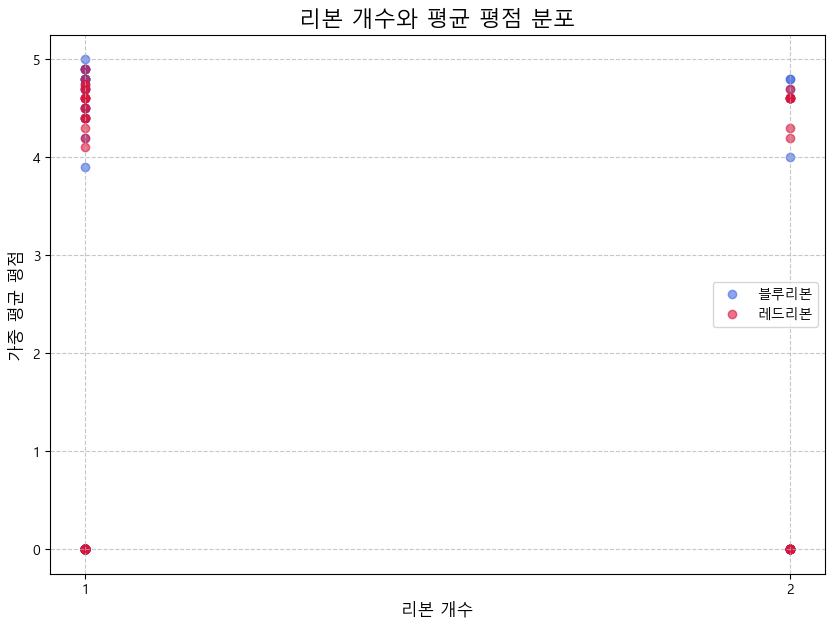

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/total_data.csv')
df.fillna(0, inplace=True)
# 가중 평균 평점을 계산합니다.
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1  # 0으로 나누는 것을 방지합니다.
df['weighted_point'] = numerator / denominator

# --- 2. 리본 개수별 평점 분포 시각화 ---
# 블루리본과 레드리본을 받은 식당들만 선택합니다.
blue_ribbon_df = df[df['blue_ribbon_count'] > 0]
red_ribbon_df = df[df['red_ribbon_count'] > 0]

# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(10, 7))
# 블루리본 데이터 산점도: x축은 블루리본 개수, y축은 가중 평균 평점입니다.
plt.scatter(blue_ribbon_df['blue_ribbon_count'], blue_ribbon_df['weighted_point'], color='royalblue', alpha=0.6, label='블루리본')
# 레드리본 데이터 산점도: x축은 레드리본 개수, y축은 가중 평균 평점입니다.
plt.scatter(red_ribbon_df['red_ribbon_count'], red_ribbon_df['weighted_point'], color='crimson', alpha=0.6, label='레드리본')

# 그래프의 제목과 축 라벨을 설정합니다.
plt.title('리본 개수와 평균 평점 분포', fontsize=16)
plt.xlabel('리본 개수', fontsize=12)
plt.ylabel('가중 평균 평점', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 눈금을 정수로 표시합니다. (예: 1.0, 2.0 ...)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

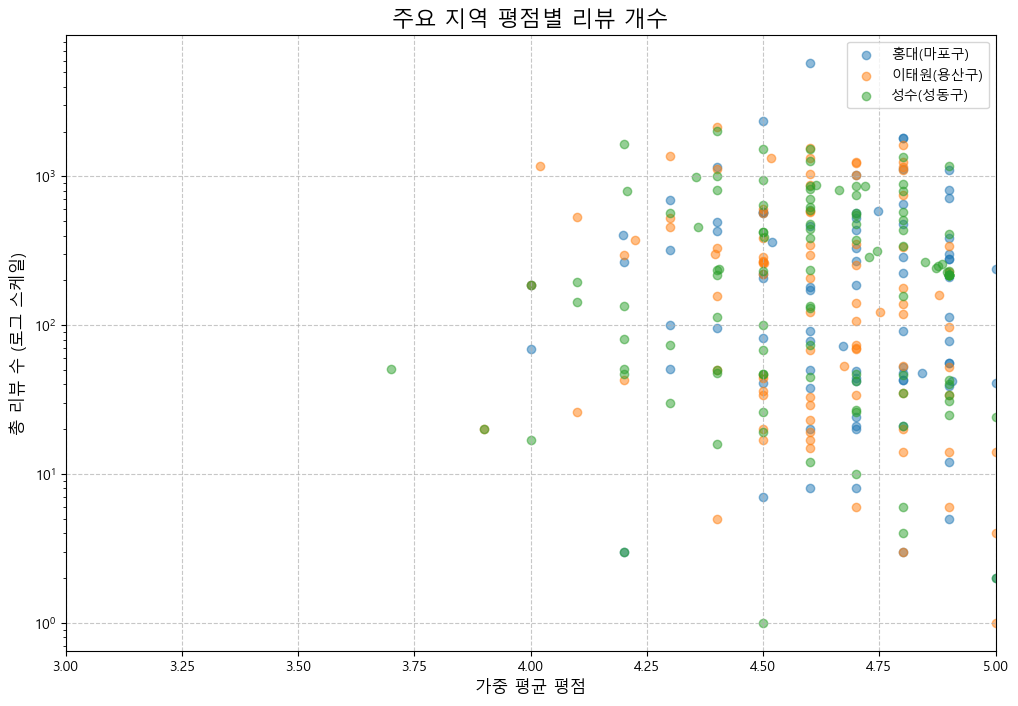

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/total_data.csv')
df.fillna(0, inplace=True)
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1
df['weighted_point'] = numerator / denominator

# --- 3. 지역별 평점과 리뷰 개수 관계 시각화 ---
# 'address' 열에 각 지역 이름이 포함된 행만 선택합니다.
hongdae_df = df[df['address'].str.contains('마포구', na=False)]
itaewon_df = df[df['address'].str.contains('용산구', na=False)]
seongsu_df = df[df['address'].str.contains('성동구', na=False)]

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 각 지역별로 산점도를 그립니다.
plt.scatter(hongdae_df['weighted_point'], hongdae_df['total_reviews'], alpha=0.5, label='홍대(마포구)')
plt.scatter(itaewon_df['weighted_point'], itaewon_df['total_reviews'], alpha=0.5, label='이태원(용산구)')
plt.scatter(seongsu_df['weighted_point'], seongsu_df['total_reviews'], alpha=0.5, label='성수(성동구)')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('주요 지역 평점별 리뷰 개수', fontsize=16)
plt.xlabel('가중 평균 평점', fontsize=12)
plt.ylabel('총 리뷰 수 (로그 스케일)', fontsize=12)
# y축을 로그 스케일로 변경하여 리뷰 수가 적은 식당들의 분포를 더 잘 보이게 합니다.
plt.yscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 범위를 3.0에서 5.0으로 설정하여 유의미한 평점 구간에 집중합니다.
plt.xlim(3, 5)

plt.show()

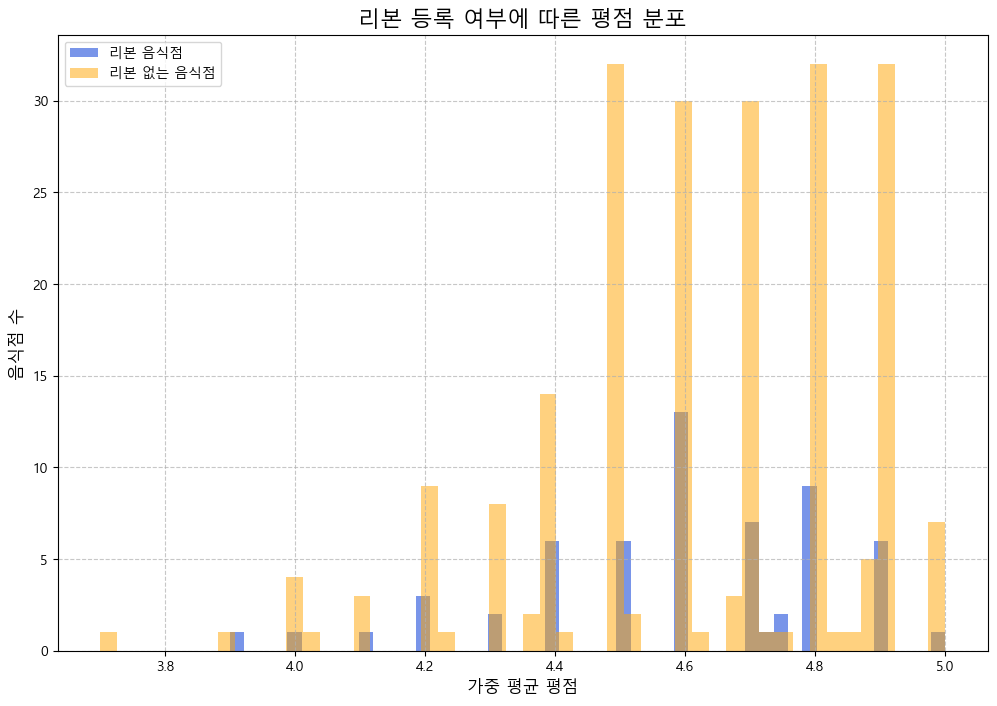

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/total_data.csv')
df.fillna(0, inplace=True)
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1
df['weighted_point'] = numerator / denominator

# --- 4. 리본 등록 여부에 따른 평점 분포 시각화 ---
# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 평점이 0인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_points = ribbon_df[ribbon_df['weighted_point'] > 0]['weighted_point']
non_ribbon_points = non_ribbon_df[non_ribbon_df['weighted_point'] > 0]['weighted_point']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 50개로 설정합니다.
bins = 50
# '리본 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_points, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_points, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 평점 분포', fontsize=16)
plt.xlabel('가중 평균 평점', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

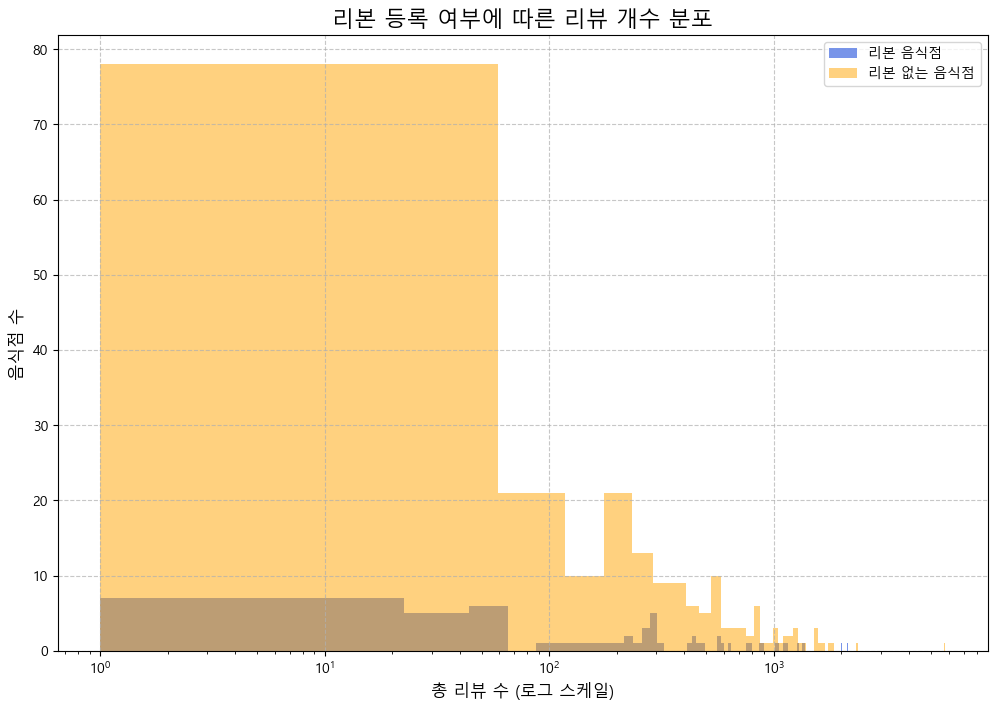

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/total_data.csv')
df.fillna(0, inplace=True)
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']

# --- 5. 리본 등록 여부에 따른 리뷰 개수 분포 시각화 ---
# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 리뷰가 0개인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_reviews = ribbon_df[ribbon_df['total_reviews'] > 0]['total_reviews']
non_ribbon_reviews = non_ribbon_df[non_ribbon_df['total_reviews'] > 0]['total_reviews']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 100개로 설정합니다.
bins = 100
# '리본 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_reviews, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_reviews, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 리뷰 개수 분포', fontsize=16)
plt.xlabel('총 리뷰 수 (로그 스케일)', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# x축을 로그 스케일로 변경합니다.
plt.xscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

---

### res.csv

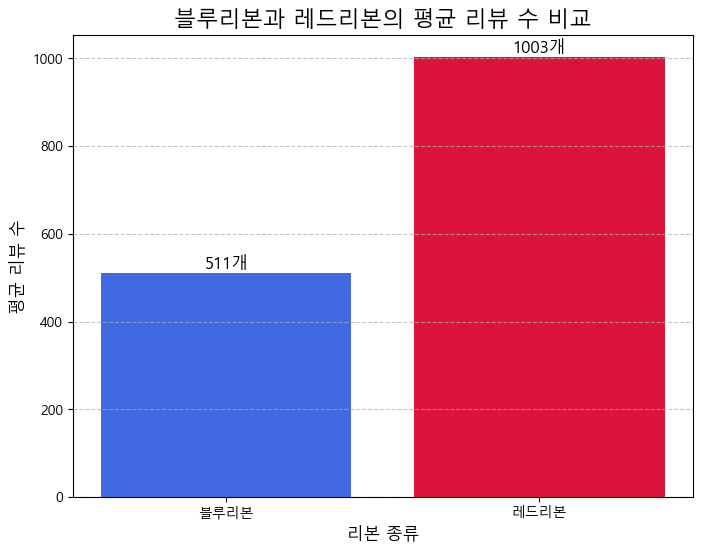

In [126]:
# 데이터 분석을 위한 pandas와 시각화를 위한 matplotlib 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib에서 한글 폰트를 사용하기 위한 설정입니다. ('Malgun Gothic'은 윈도우 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# --- 데이터 준비 (모든 시각화에 공통으로 사용) ---
# CSV 파일을 읽어와 데이터프레임으로 만듭니다.
df = pd.read_csv('./data/restaurant_review_base_catchTable.csv')
# 비어있는 값(NaN)을 모두 0으로 채웁니다.
df.fillna(0, inplace=True)
# '총 리뷰 수'를 계산하여 'total_reviews'라는 새로운 열에 저장합니다.
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']

# --- 1. 리본별 평균 리뷰 수 시각화 ---
# 블루리본을 1개 이상 받은 식당들의 'total_reviews' 열의 평균을 구합니다.
avg_reviews_blue = df[df['blue_ribbon_count'] > 0]['total_reviews'].mean()
# 레드리본을 1개 이상 받은 식당들의 'total_reviews' 열의 평균을 구합니다.
avg_reviews_red = df[df['red_ribbon_count'] > 0]['total_reviews'].mean()

# x축에 표시될 카테고리 이름과 y축에 표시될 값을 준비합니다.
categories = ['블루리본', '레드리본']
review_counts = [avg_reviews_blue, avg_reviews_red]

# 그래프를 그릴 도화지를 준비하고, 가로 8, 세로 6 크기로 설정합니다.
plt.figure(figsize=(8, 6))
# 막대 차트를 그립니다.
bars = plt.bar(categories, review_counts, color=['royalblue', 'crimson'])

# 각 막대의 위에 정확한 수치를 텍스트로 표시하기 위한 반복문입니다.
for bar in bars:
    yval = bar.get_height()
    # f'{yval:.0f}개'는 값을 정수로 변환하고 '개'를 붙여 표시하라는 의미입니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.0f}개', va='bottom', ha='center', fontsize=12)

# 그래프의 제목, x축 라벨, y축 라벨을 설정합니다.
plt.title('블루리본과 레드리본의 평균 리뷰 수 비교', fontsize=16)
plt.xlabel('리본 종류', fontsize=12)
plt.ylabel('평균 리뷰 수', fontsize=12)
# y축에 격자무늬를 추가하여 가독성을 높입니다.
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

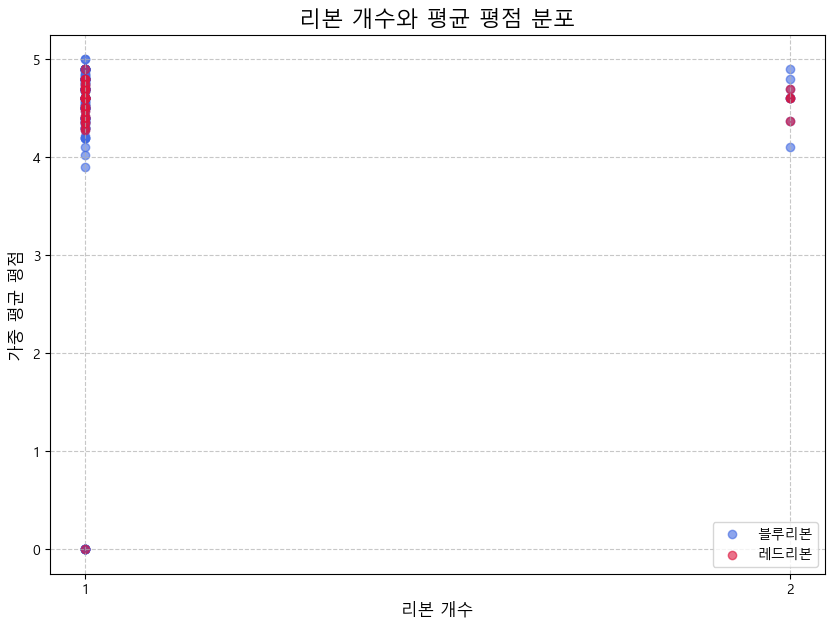

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/restaurant_review_base_catchTable.csv')
df.fillna(0, inplace=True)
# 가중 평균 평점을 계산합니다.
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1  # 0으로 나누는 것을 방지합니다.
df['weighted_point'] = numerator / denominator

# --- 2. 리본 개수별 평점 분포 시각화 ---
# 블루리본과 레드리본을 받은 식당들만 선택합니다.
blue_ribbon_df = df[df['blue_ribbon_count'] > 0]
red_ribbon_df = df[df['red_ribbon_count'] > 0]

# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(10, 7))
# 블루리본 데이터 산점도: x축은 블루리본 개수, y축은 가중 평균 평점입니다.
plt.scatter(blue_ribbon_df['blue_ribbon_count'], blue_ribbon_df['weighted_point'], color='royalblue', alpha=0.6, label='블루리본')
# 레드리본 데이터 산점도: x축은 레드리본 개수, y축은 가중 평균 평점입니다.
plt.scatter(red_ribbon_df['red_ribbon_count'], red_ribbon_df['weighted_point'], color='crimson', alpha=0.6, label='레드리본')

# 그래프의 제목과 축 라벨을 설정합니다.
plt.title('리본 개수와 평균 평점 분포', fontsize=16)
plt.xlabel('리본 개수', fontsize=12)
plt.ylabel('가중 평균 평점', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 눈금을 정수로 표시합니다. (예: 1.0, 2.0 ...)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

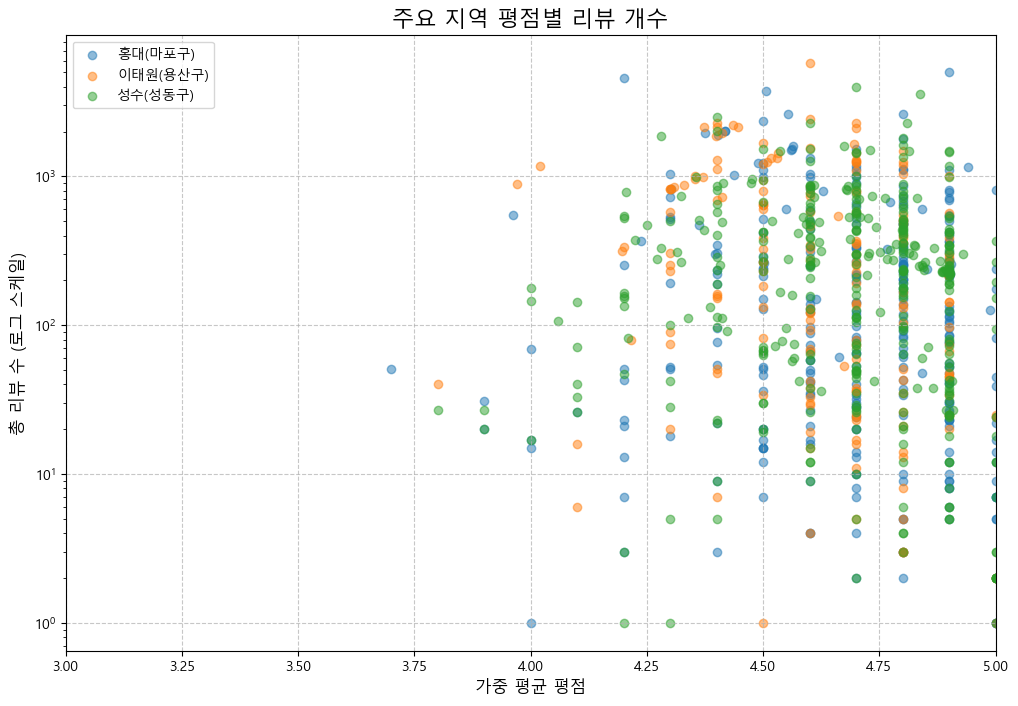

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/restaurant_review_base_catchTable.csv')
df.fillna(0, inplace=True)
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1
df['weighted_point'] = numerator / denominator

# --- 3. 지역별 평점과 리뷰 개수 관계 시각화 ---
# 'address' 열에 각 지역 이름이 포함된 행만 선택합니다.
hongdae_df = df[df['address'].str.contains('마포구', na=False)]
itaewon_df = df[df['address'].str.contains('용산구', na=False)]
seongsu_df = df[df['address'].str.contains('성동구', na=False)]

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 각 지역별로 산점도를 그립니다.
plt.scatter(hongdae_df['weighted_point'], hongdae_df['total_reviews'], alpha=0.5, label='홍대(마포구)')
plt.scatter(itaewon_df['weighted_point'], itaewon_df['total_reviews'], alpha=0.5, label='이태원(용산구)')
plt.scatter(seongsu_df['weighted_point'], seongsu_df['total_reviews'], alpha=0.5, label='성수(성동구)')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('주요 지역 평점별 리뷰 개수', fontsize=16)
plt.xlabel('가중 평균 평점', fontsize=12)
plt.ylabel('총 리뷰 수 (로그 스케일)', fontsize=12)
# y축을 로그 스케일로 변경하여 리뷰 수가 적은 식당들의 분포를 더 잘 보이게 합니다.
plt.yscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 범위를 3.0에서 5.0으로 설정하여 유의미한 평점 구간에 집중합니다.
plt.xlim(3, 5)

plt.show()

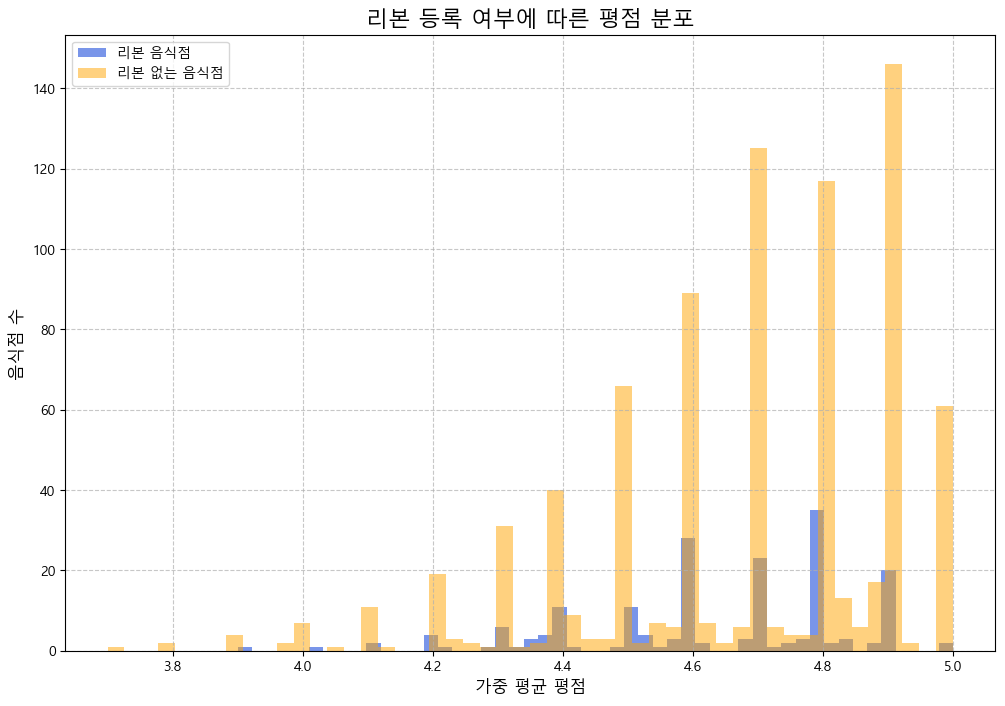

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/restaurant_review_base_catchTable.csv')
df.fillna(0, inplace=True)
numerator = (df['catchTable_review_point'] * df['catchTable_review_count']) + (df['googleMap_review_point'] * df['googleMap_review_count'])
denominator = df['catchTable_review_count'] + df['googleMap_review_count']
denominator[denominator == 0] = 1
df['weighted_point'] = numerator / denominator

# --- 4. 리본 등록 여부에 따른 평점 분포 시각화 ---
# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 평점이 0인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_points = ribbon_df[ribbon_df['weighted_point'] > 0]['weighted_point']
non_ribbon_points = non_ribbon_df[non_ribbon_df['weighted_point'] > 0]['weighted_point']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 50개로 설정합니다.
bins = 50
# '리본 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_points, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_points, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 평점 분포', fontsize=16)
plt.xlabel('가중 평균 평점', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

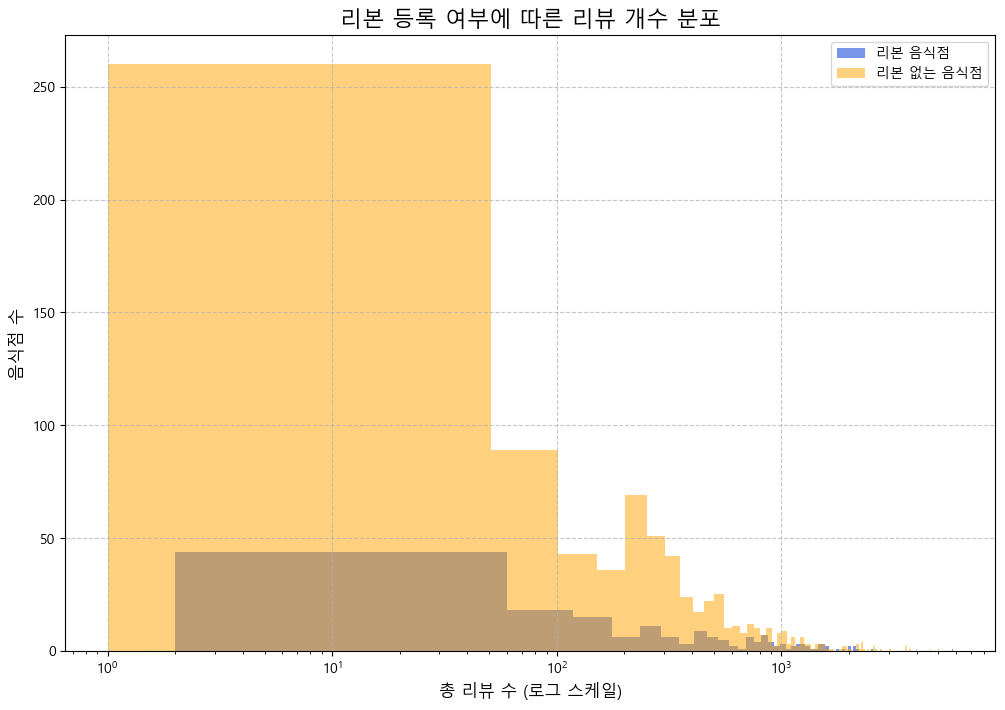

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 데이터 준비 ---
df = pd.read_csv('./data/restaurant_review_base_catchTable.csv')
df.fillna(0, inplace=True)
df['total_reviews'] = df['catchTable_review_count'] + df['googleMap_review_count']

# --- 5. 리본 등록 여부에 따른 리뷰 개수 분포 시각화 ---
# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 리뷰가 0개인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_reviews = ribbon_df[ribbon_df['total_reviews'] > 0]['total_reviews']
non_ribbon_reviews = non_ribbon_df[non_ribbon_df['total_reviews'] > 0]['total_reviews']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 100개로 설정합니다.
bins = 100
# '리본 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_reviews, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_reviews, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 리뷰 개수 분포', fontsize=16)
plt.xlabel('총 리뷰 수 (로그 스케일)', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# x축을 로그 스케일로 변경합니다.
plt.xscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

---

### good

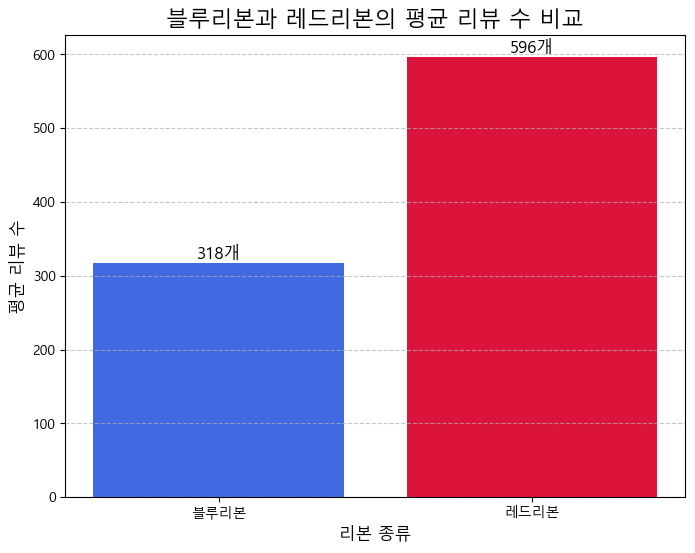

In [127]:
# 데이터 분석을 위한 pandas와 시각화를 위한 matplotlib 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib에서 한글 폰트를 사용하기 위한 설정입니다. ('Malgun Gothic'은 윈도우 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# --- 1. 리본별 평균 리뷰 수 시각화 ---
# CSV 파일을 읽어와 데이터프레임으로 만듭니다.
df = pd.read_csv('./data/good_restaurant.csv')

# 블루리본을 1개 이상 받은 식당들의 'review_count_sum'(총 리뷰 수) 열의 평균을 구합니다.
avg_reviews_blue = df[df['blue_ribbon_count'] > 0]['review_count_sum'].mean()
# 레드리본을 1개 이상 받은 식당들의 'review_count_sum'(총 리뷰 수) 열의 평균을 구합니다.
avg_reviews_red = df[df['red_ribbon_count'] > 0]['review_count_sum'].mean()

# x축에 표시될 카테고리 이름과 y축에 표시될 값을 준비합니다.
categories = ['블루리본', '레드리본']
review_counts = [avg_reviews_blue, avg_reviews_red]

# 그래프를 그릴 도화지를 준비하고, 가로 8, 세로 6 크기로 설정합니다.
plt.figure(figsize=(8, 6))
# 막대 차트를 그립니다.
bars = plt.bar(categories, review_counts, color=['royalblue', 'crimson'])

# 각 막대의 위에 정확한 수치를 텍스트로 표시하기 위한 반복문입니다.
for bar in bars:
    yval = bar.get_height()
    # f'{yval:.0f}개'는 값을 정수로 변환하고 '개'를 붙여 표시하라는 의미입니다.
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.0f}개', va='bottom', ha='center', fontsize=12)

# 그래프의 제목, x축 라벨, y축 라벨을 설정합니다.
plt.title('블루리본과 레드리본의 평균 리뷰 수 비교', fontsize=16)
plt.xlabel('리본 종류', fontsize=12)
plt.ylabel('평균 리뷰 수', fontsize=12)
# y축에 격자무늬를 추가하여 가독성을 높입니다.
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

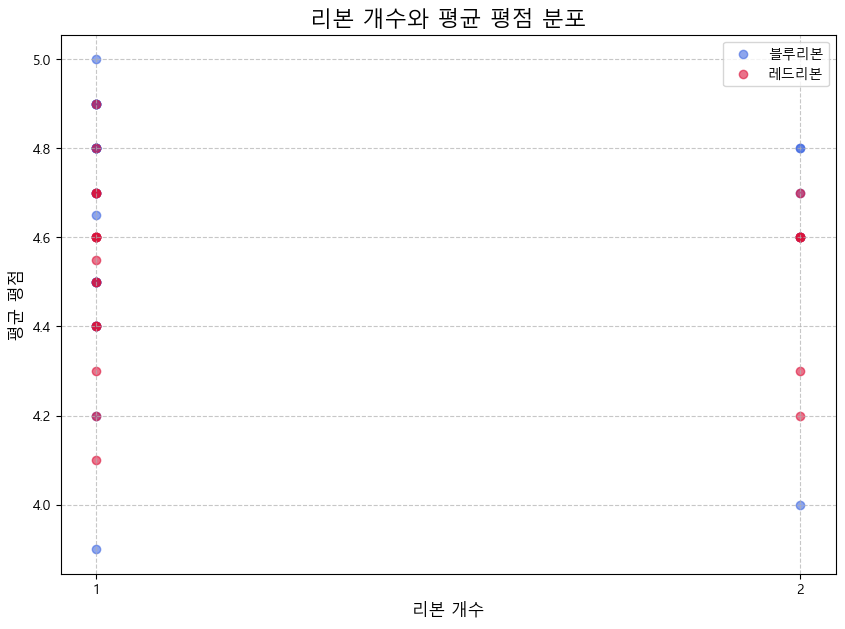

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 2. 리본 개수별 평점 분포 시각화 ---
df = pd.read_csv('./data/good_restaurant.csv')

# 블루리본과 레드리본을 받은 식당들만 선택합니다.
blue_ribbon_df = df[df['blue_ribbon_count'] > 0]
red_ribbon_df = df[df['red_ribbon_count'] > 0]

# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(10, 7))
# 블루리본 데이터 산점도: x축은 블루리본 개수, y축은 평균 평점입니다.
plt.scatter(blue_ribbon_df['blue_ribbon_count'], blue_ribbon_df['ratings_mean'], color='royalblue', alpha=0.6, label='블루리본')
# 레드리본 데이터 산점도: x축은 레드리본 개수, y축은 평균 평점입니다.
plt.scatter(red_ribbon_df['red_ribbon_count'], red_ribbon_df['ratings_mean'], color='crimson', alpha=0.6, label='레드리본')

# 그래프의 제목과 축 라벨을 설정합니다.
plt.title('리본 개수와 평균 평점 분포', fontsize=16)
plt.xlabel('리본 개수', fontsize=12)
plt.ylabel('평균 평점', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 눈금을 정수로 표시합니다. (예: 1.0, 2.0 ...)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

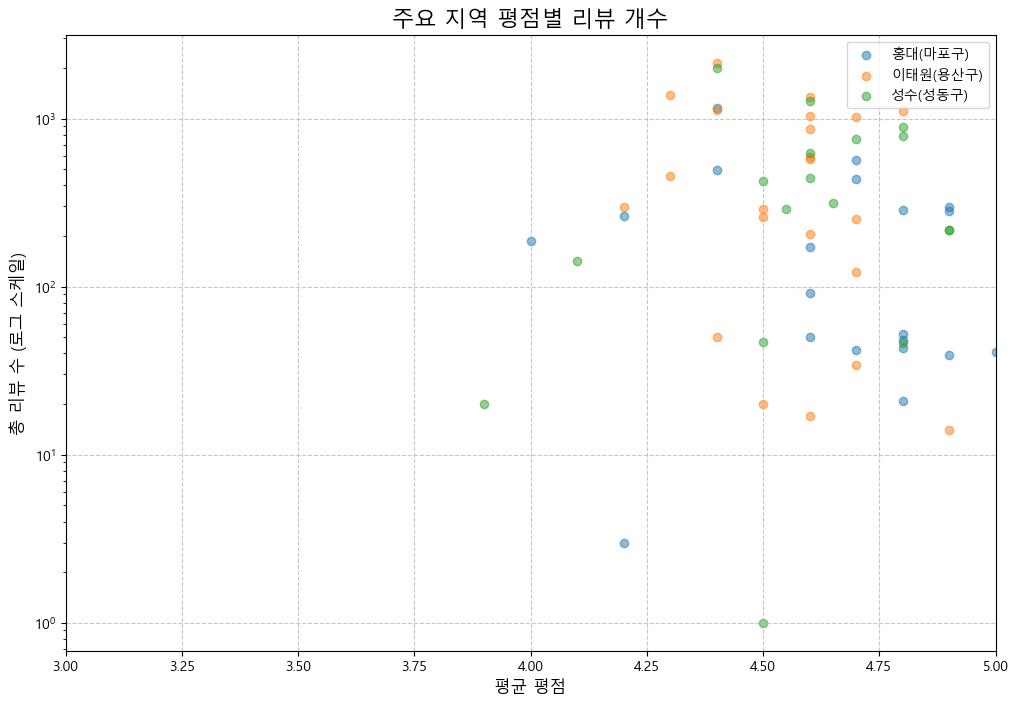

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 3. 지역별 평점과 리뷰 개수 관계 시각화 ---
df = pd.read_csv('./data/good_restaurant.csv')
df.fillna('', inplace=True) # 주소에 빈 값이 있을 경우를 대비해 빈 문자열로 채웁니다.

# 'address' 열에 각 지역 이름이 포함된 행만 선택합니다.
hongdae_df = df[df['address'].str.contains('마포구')]
itaewon_df = df[df['address'].str.contains('용산구')]
seongsu_df = df[df['address'].str.contains('성동구')]

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 각 지역별로 산점도를 그립니다.
plt.scatter(hongdae_df['ratings_mean'], hongdae_df['review_count_sum'], alpha=0.5, label='홍대(마포구)')
plt.scatter(itaewon_df['ratings_mean'], itaewon_df['review_count_sum'], alpha=0.5, label='이태원(용산구)')
plt.scatter(seongsu_df['ratings_mean'], seongsu_df['review_count_sum'], alpha=0.5, label='성수(성동구)')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('주요 지역 평점별 리뷰 개수', fontsize=16)
plt.xlabel('평균 평점', fontsize=12)
plt.ylabel('총 리뷰 수 (로그 스케일)', fontsize=12)
# y축을 로그 스케일로 변경하여 리뷰 수가 적은 식당들의 분포를 더 잘 보이게 합니다.
plt.yscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 범위를 3.0에서 5.0으로 설정하여 유의미한 평점 구간에 집중합니다.
plt.xlim(3, 5)

plt.show()

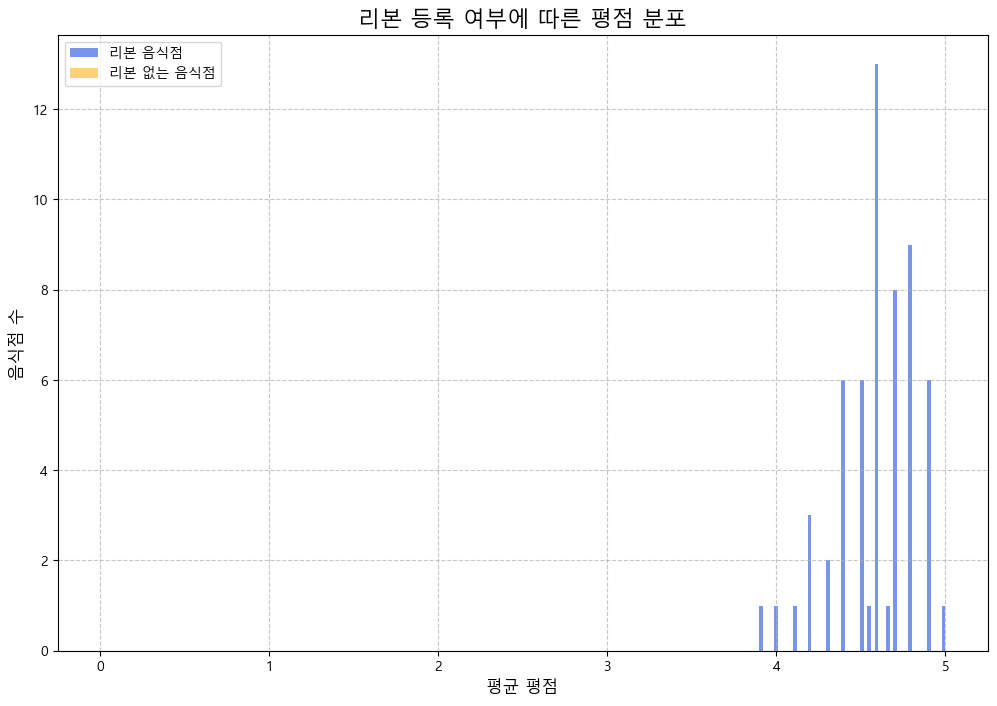

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 4. 리본 등록 여부에 따른 평점 분포 시각화 ---
df = pd.read_csv('./data/good_restaurant.csv')

# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 평점이 0인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_points = ribbon_df[ribbon_df['ratings_mean'] > 0]['ratings_mean']
non_ribbon_points = non_ribbon_df[non_ribbon_df['ratings_mean'] > 0]['ratings_mean']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 50개로 설정합니다.
bins = 50
# '리본 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_points, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 평점 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_points, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 평점 분포', fontsize=16)
plt.xlabel('평균 평점', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

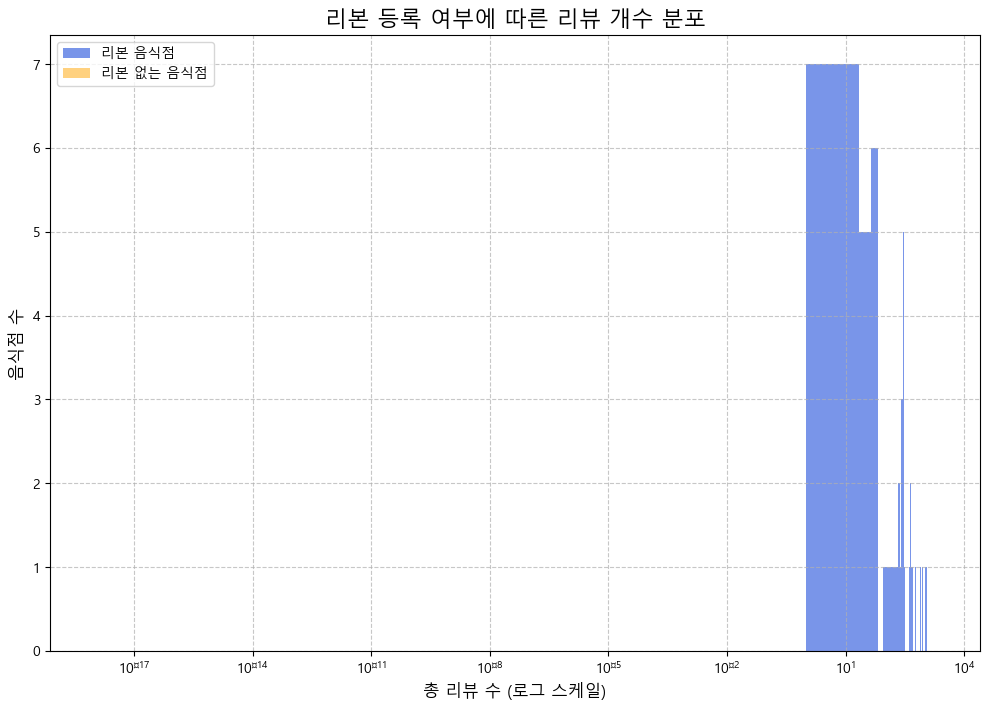

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 5. 리본 등록 여부에 따른 리뷰 개수 분포 시각화 ---
df = pd.read_csv('./data/good_restaurant.csv')

# 리본을 1개 이상 받은 식당 그룹을 선택합니다.
ribbon_df = df[(df['blue_ribbon_count'] > 0) | (df['red_ribbon_count'] > 0)]
# 리본을 받지 않은 식당 그룹을 선택합니다.
non_ribbon_df = df[(df['blue_ribbon_count'] == 0) & (df['red_ribbon_count'] == 0)]

# 리뷰가 0개인 식당은 제외하여 더 의미 있는 분포를 봅니다.
ribbon_reviews = ribbon_df[ribbon_df['review_count_sum'] > 0]['review_count_sum']
non_ribbon_reviews = non_ribbon_df[non_ribbon_df['review_count_sum'] > 0]['review_count_sum']

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 히스토그램의 막대 개수를 100개로 설정합니다.
bins = 100
# '리본 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(ribbon_reviews, bins=bins, alpha=0.7, label='리본 음식점', color='royalblue')
# '리본 없는 음식점' 그룹의 리뷰 수 분포에 대한 히스토그램을 그립니다.
plt.hist(non_ribbon_reviews, bins=bins, alpha=0.5, label='리본 없는 음식점', color='orange')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('리본 등록 여부에 따른 리뷰 개수 분포', fontsize=16)
plt.xlabel('총 리뷰 수 (로그 스케일)', fontsize=12)
plt.ylabel('음식점 수', fontsize=12)
# x축을 로그 스케일로 변경합니다.
plt.xscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

---

### non_good

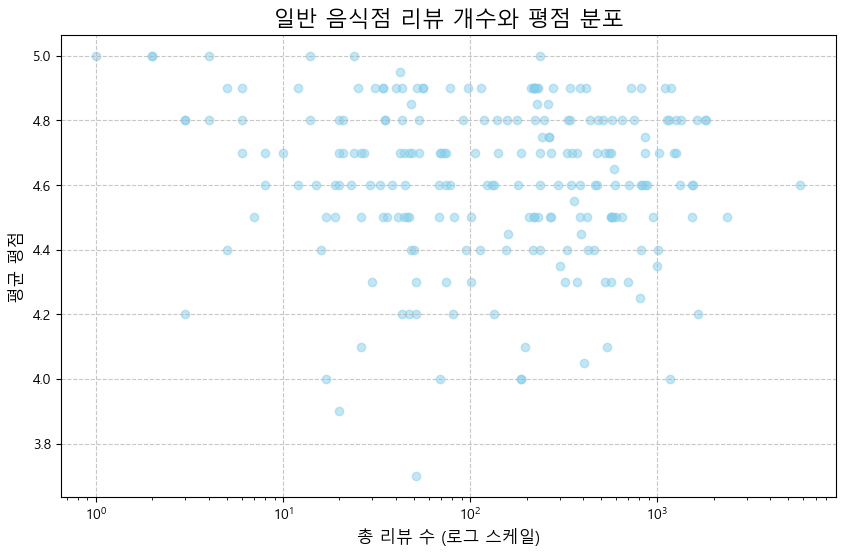

In [132]:
# 데이터 분석을 위한 pandas와 시각화를 위한 matplotlib 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib에서 한글 폰트를 사용하기 위한 설정입니다. ('Malgun Gothic'은 윈도우 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# --- 1. 일반 음식점 리뷰 개수와 평점 분포 시각화 ---
# CSV 파일을 읽어와 데이터프레임으로 만듭니다.
df = pd.read_csv('./data/non_good_restaurant.csv')
# 비어있는 값(NaN)을 0으로 채웁니다.
df.fillna(0, inplace=True)

# 평점과 리뷰 수가 모두 0보다 큰, 유효한 데이터만 선택합니다.
valid_data = df[(df['ratings_mean'] > 0) & (df['review_count_sum'] > 0)]

# 그래프를 그릴 도화지를 준비하고, 가로 10, 세로 6 크기로 설정합니다.
plt.figure(figsize=(10, 6))
# 산점도를 그립니다.
plt.scatter(valid_data['review_count_sum'], valid_data['ratings_mean'], alpha=0.5, color='skyblue')

# 그래프의 제목, x축 라벨, y축 라벨을 설정합니다.
plt.title('일반 음식점 리뷰 개수와 평점 분포', fontsize=16)
plt.xlabel('총 리뷰 수 (로그 스케일)', fontsize=12)
plt.ylabel('평균 평점', fontsize=12)
# x축을 로그 스케일로 변경하여 데이터 분포를 더 잘 보이게 합니다.
plt.xscale('log')
# 배경에 격자무늬를 추가하여 가독성을 높입니다.
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

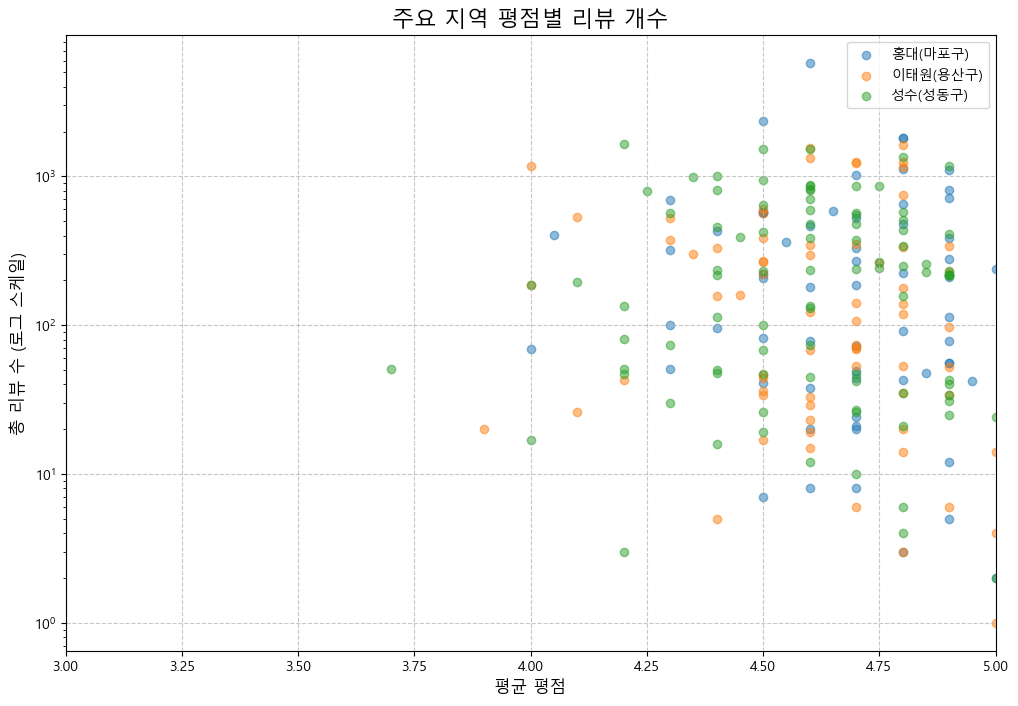

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# --- 2. 지역별 평점과 리뷰 개수 관계 시각화 ---
df = pd.read_csv('./data/non_good_restaurant.csv')
# 주소(address) 열에 비어있는 값이 있을 경우를 대비해 빈 문자열로 채웁니다.
df.fillna({'address': ''}, inplace=True)

# 'address' 열의 내용으로 각 지역에 해당하는 데이터만 선택합니다.
hongdae_df = df[df['address'].str.contains('마포구')]
itaewon_df = df[df['address'].str.contains('용산구')]
seongsu_df = df[df['address'].str.contains('성동구')]

# 그래프 도화지를 준비합니다.
plt.figure(figsize=(12, 8))
# 각 지역별로 산점도를 그립니다.
plt.scatter(hongdae_df['ratings_mean'], hongdae_df['review_count_sum'], alpha=0.5, label='홍대(마포구)')
plt.scatter(itaewon_df['ratings_mean'], itaewon_df['review_count_sum'], alpha=0.5, label='이태원(용산구)')
plt.scatter(seongsu_df['ratings_mean'], seongsu_df['review_count_sum'], alpha=0.5, label='성수(성동구)')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('주요 지역 평점별 리뷰 개수', fontsize=16)
plt.xlabel('평균 평점', fontsize=12)
plt.ylabel('총 리뷰 수 (로그 스케일)', fontsize=12)
# y축을 로그 스케일로 변경하여 리뷰 수가 다양한 식당들의 분포를 더 잘 보이게 합니다.
plt.yscale('log')
# 범례를 표시합니다.
plt.legend()
# 배경에 격자무늬를 추가합니다.
plt.grid(True, linestyle='--', alpha=0.7)
# x축 범위를 3.0에서 5.0으로 설정하여 유의미한 평점 구간에 집중합니다.
plt.xlim(3, 5)

plt.show()